In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()

%matplotlib inline

In [2]:
path_data = os.path.join('D:', 'Zillow', 'properties_2016.csv')
raw_data = pd.read_csv(path_data)
path_data = os.path.join('D:', 'Zillow', 'train_2016_v2.csv')
log_errors = pd.read_csv(path_data)

C:\Users\chris\Anaconda3\envs\mlp\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (22,32,34,49,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
raw_data.head()

,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,10754147,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,9.0,2015.0,9.0,NaN,NaN,NaN,NaN
1,10759547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,27516.0,2015.0,27516.0,NaN,NaN,NaN,NaN
2,10843547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,650756.0,1413387.0,2015.0,762631.0,20800.37,NaN,NaN,NaN
3,10859147,NaN,NaN,NaN,0.0,0.0,3.0,7.0,NaN,NaN,...,1.0,NaN,571346.0,1156834.0,2015.0,585488.0,14557.57,NaN,NaN,NaN
4,10879947,NaN,NaN,NaN,0.0,0.0,4.0,NaN,NaN,NaN,...,NaN,NaN,193796.0,433491.0,2015.0,239695.0,5725.17,NaN,NaN,NaN


In [4]:
log_errors.head()

,parcelid,logerror,transactiondate
0,11016594,0.0276,2016-01-01
1,14366692,-0.1684,2016-01-01
2,12098116,-0.0040,2016-01-01
3,12643413,0.0218,2016-01-02
4,14432541,-0.0050,2016-01-02


In [5]:
print('There are {0} rows and {1} columns in the features dataset'.format(raw_data.shape[0],raw_data.shape[1]))

There are 2985217 rows and 58 columns in the features dataset


In [6]:
print('There are {0} rows and {1} columns in the errors dataset'.format(log_errors.shape[0],log_errors.shape[1]))

There are 90275 rows and 3 columns in the errors dataset


In [7]:
log_errors['transactiondate']= pd.to_datetime(log_errors['transactiondate'])

In [8]:
#create time features
log_errors['Month'] = pd.DatetimeIndex(log_errors['transactiondate']).month
log_errors['Day'] = pd.DatetimeIndex(log_errors['transactiondate']).weekday_name
log_errors['Year'] = pd.DatetimeIndex(log_errors['transactiondate']).year
log_errors['Quarter'] = pd.DatetimeIndex(log_errors['transactiondate']).quarter

In [9]:
log_errors.head()

,parcelid,logerror,transactiondate,Month,Day,Year,Quarter
0,11016594,0.0276,2016-01-01,1,Friday,2016,1
1,14366692,-0.1684,2016-01-01,1,Friday,2016,1
2,12098116,-0.0040,2016-01-01,1,Friday,2016,1
3,12643413,0.0218,2016-01-02,1,Saturday,2016,1
4,14432541,-0.0050,2016-01-02,1,Saturday,2016,1


In [10]:
log_errors.Quarter.unique()

array([1, 2, 3, 4], dtype=int64)

In [11]:
log_errors.Month.unique()

array([ 1,  6,  9,  7,  8,  5, 10, 12,  4,  2,  3, 11], dtype=int64)

In [12]:
# dublicates
temp = log_errors['parcelid'].unique()
temp.shape

(90150,)

In [13]:
(log_errors['parcelid'].value_counts().reset_index())['parcelid'].value_counts()

1    90026
2      123
3        1
Name: parcelid, dtype: int64

In [16]:
#rename attributes
raw_data = raw_data.rename(columns={'parcelid' : 'parcelid',
  'build_year' : 'yearbuilt',
  'area_basement' : 'basementsqft',
  'area_patio' : 'yardbuildingsqft17',
  'area_shed' : 'yardbuildingsqft26', 
  'area_pool' : 'poolsizesum',  
  'area_lot' : 'lotsizesquarefeet', 
  'area_garage' : 'garagetotalsqft',
  'area_firstfloor_finished' : 'finishedfloor1squarefeet',
  'area_total_calc' : 'calculatedfinishedsquarefeet',
  'area_base' : 'finishedsquarefeet6',
  'area_live_finished' : 'finishedsquarefeet12',
  'area_liveperi_finished' : 'finishedsquarefeet13',
  'area_total_finished' : 'finishedsquarefeet15',  
  'area_unknown' : 'finishedsquarefeet50',
  'num_unit' : 'unitcnt', 
  'num_story' : 'numberofstories',  
  'num_room' : 'roomcnt',
  'num_bathroom' : 'bathroomcnt',
  'num_bedroom' : 'bedroomcnt',
  'num_bathroom_calc' : 'calculatedbathnbr',
  'num_bath ': 'fullbathcnt',  
  'num_75_bath' : 'threequarterbathnbr', 
  'num_fireplace' : 'fireplacecnt',
  'num_pool' : 'poolcnt',  
  'num_garage' : 'garagecarcnt',  
  'region_county' : 'regionidcounty',
  'region_city' : 'regionidcity',
  'region_zip' : 'regionidzip',
  'region_neighbor' : 'regionidneighborhood',  
  'tax_total' : 'taxvaluedollarcnt',
  'tax_building ': 'structuretaxvaluedollarcnt',
  'tax_land' : 'landtaxvaluedollarcnt',
  'tax_property' : 'taxamount',
  'tax_year' : 'assessmentyear',
  'tax_delinquency' : 'taxdelinquencyflag',
  'tax_delinquency_year' : 'taxdelinquencyyear',
  'zoning_property' : 'propertyzoningdesc',
  'zoning_landuse' : 'propertylandusetypeid',
  'zoning_landuse_county' : 'propertycountylandusecode',
  'flag_fireplace' : 'fireplaceflag', 
  'flag_tub' : 'hashottuborspa',
  'quality' : 'buildingqualitytypeid',
  'framing' : 'buildingclasstypeid',
  'material' : 'typeconstructiontypeid',
  'deck' : 'decktypeid',
  'story' : 'storytypeid',
  'heating' : 'heatingorsystemtypeid',
  'aircon' : 'airconditioningtypeid',
  'architectural_style' : 'architecturalstyletypeid'})

In [17]:
raw_data

,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,10754147,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,9.0,2015.0,9.0,NaN,NaN,NaN,NaN
1,10759547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,27516.0,2015.0,27516.0,NaN,NaN,NaN,NaN
2,10843547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,650756.0,1413387.0,2015.0,762631.0,20800.37,NaN,NaN,NaN
3,10859147,NaN,NaN,NaN,0.0,0.0,3.0,7.0,NaN,NaN,...,1.0,NaN,571346.0,1156834.0,2015.0,585488.0,14557.57,NaN,NaN,NaN
4,10879947,NaN,NaN,NaN,0.0,0.0,4.0,NaN,NaN,NaN,...,NaN,NaN,193796.0,433491.0,2015.0,239695.0,5725.17,NaN,NaN,NaN
5,10898347,NaN,NaN,NaN,0.0,0.0,4.0,7.0,NaN,NaN,...,1.0,NaN,176383.0,283315.0,2015.0,106932.0,3661.28,NaN,NaN,NaN
6,10933547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,397945.0,554573.0,2015.0,156628.0,6773.34,NaN,NaN,NaN
7,10940747,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,1.0,NaN,101998.0,688486.0,2015.0,586488.0,7857.84,NaN,NaN,NaN
8,10954547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,9.0,2015.0,9.0,NaN,NaN,NaN,NaN
9,10976347,NaN,NaN,NaN,0.0,0.0,3.0,7.0,NaN,NaN,...,1.0,NaN,218440.0,261201.0,2015.0,42761.0,4054.76,NaN,NaN,NaN


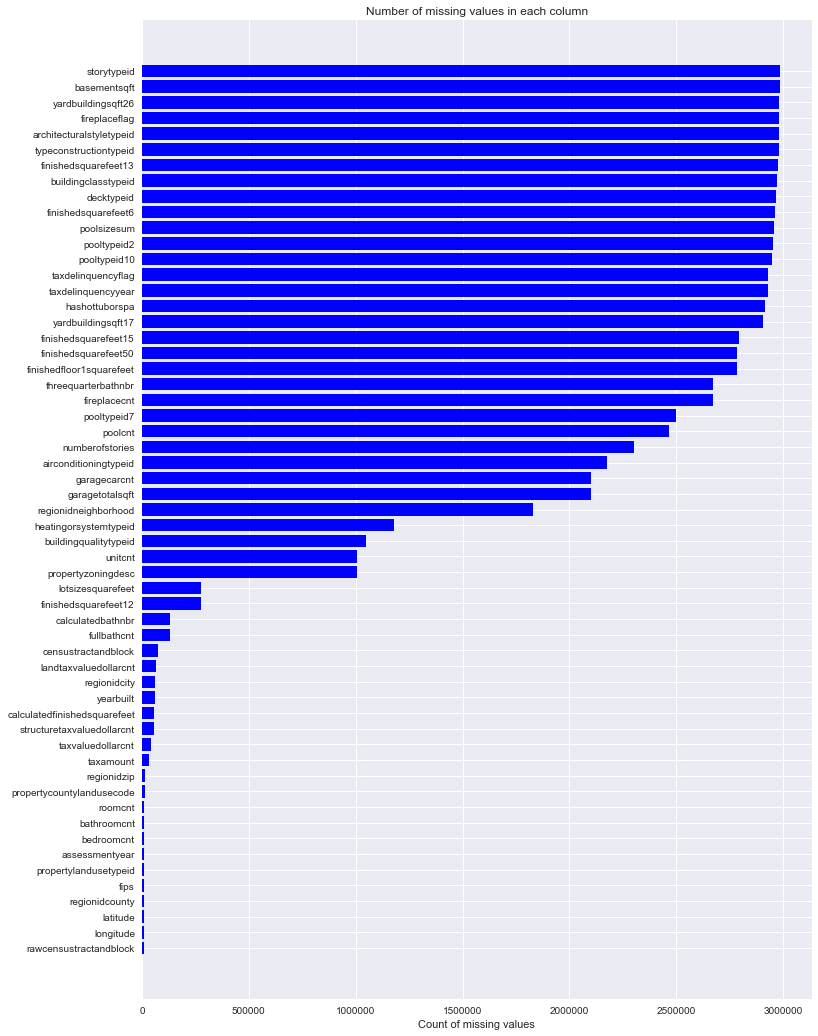

In [18]:
# explore missing values
missing = raw_data.isnull().sum(axis=0).reset_index()
missing.columns = ['column_name', 'missing_count']
missing = missing.ix[missing['missing_count']>0]
missing = missing.sort_values(by='missing_count')

ind = np.arange(missing.shape[0])
width = 0.9
fig, ax = plt.subplots(figsize=(12,18))
rects = ax.barh(ind, missing.missing_count.values, color='blue')
ax.set_yticks(ind)
ax.set_yticklabels(missing.column_name.values, rotation='horizontal')
ax.set_xlabel("Count of missing values")
ax.set_title("Number of missing values in each column")
plt.show()